# Week 2: Supervised Techniques for Regression
## Boston Housing Assignment

 Scikit Learn documentation for this assignment:
 http://scikit-learn.org/stable/modules/model_evaluation.html 
 http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
 http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
 http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

 
 Textbook reference materials:
 Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
 and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
 has sections covering linear regression, polynomial regression,
 and regularized linear models. Sample code from the book is 
 available on GitHub at https://github.com/ageron/handson-ml


## Requirements for this assignment

    1) Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study.
    2) Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. 
    3) Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net.
    4) Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. 


Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

## Management problem:

Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

# Discussion

After getting our data and libraries loaded in section A. Section B is dedicated to performing some exploratory data analysis. Some data are transformed here to adjust the shape of the values relative to our dependant variable (log_MV). There were a few things I was aiming to do with this assignment the first was to evaluate the impact on scaling the data on the coeficients and statistics of the model. The second objective was to evaluate traditional statistical approaches at linear regression, EDA followed by selecting the most significant features versus a machine learning route where the more impactful features are identified. 

As for the first objective Section C and D utilize a subset of the columns to look at the impact of scaling and the tranditional statistics approach. Linear regression and elastic net regression are evaluated on the scaled and unscaled data. From these experiments it is evident that the error terms will change when scaling the data because we are moving the distances between the features to a similar scale, however the significance of the feature terms remain constant. Additionally, when comparing the two methodologies, linear and elastic regression generate similar statistics in terms of RMSE, r2, p-values, and t statistics.

The second objective is addressed by sections C, D, and E. First we follow the correlation matrix from our EDA and allow the scientist/expert to select significant features. It's at this step that a limited number of features are selected which potentially to limit the degree of certainty to which we can make predictions. The scientist selects two significant features and carries them forward resulting in a parity plot (predicted vs actual values) in section D1.b and results in an RMSE of approximately 0.51. Then we utlize ridge regression to identify the most impactful features (section E1.) followed by the evaluation of the significant terms in linear regression. The resulting model with impactful terms identified from ridge regression results in an RMSE of approximately 0.2 while incoporating signifcant terms (t statistics and p-values). This methodology (ridge regrssion) cuts down on the error terms which are most likely unintentionally imparted by the scientist. 

# A: Libraries and data read-in

In [2]:
RANDOM_SEED = 12

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from math import sqrt  # for root mean-squared error calculation

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

#import from SKlearn
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics

from scipy import stats

# read data for the Boston Housing Study
boston_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/boston.csv")

## Two functions to provide some model summary stats

In [4]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
   # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    #coefs = np.append(lm.intercept_,lm.coef_)

def model_statistics(x_actual, y_actual, y_predict, coefs):

    matX = pd.DataFrame({"Constant":np.ones(len(x_actual))}).join(pd.DataFrame(x_actual.reset_index(drop=True)))
    MSE = (sum((y_actual-y_predict)**2))/(len(matX)-len(matX.columns))
    

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(matX.T,matX)).diagonal())
    
    sd_b = np.sqrt(var_b)
    ts_b = coefs/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(matX)-len(matX.columns)-1))) for i in ts_b]
    

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    coefs = np.round(coefs,4)

    SummaryDF = pd.DataFrame()
    SummaryDF["Coefficients"],SummaryDF["Standard Errors"],SummaryDF["t values"],SummaryDF["Probabilities"] = [coefs,sd_b,ts_b,p_values]

    return(SummaryDF)

# B: Descriptive Stats and Dataframe inspect

In [6]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
display(boston_input.head())
display(boston_input.tail())

print('\n\nGeneral description of the boston_input DataFrame:\n')
display(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\n\nGeneral description of the boston DataFrame:\n')

display(boston.info())

print('\nDescriptive statistics of the boston DataFrame:\n')
display(boston.describe())


boston DataFrame (first and last five rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0




General description of the boston_input DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


None



General description of the boston DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None


Descriptive statistics of the boston DataFrame:



,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'mv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

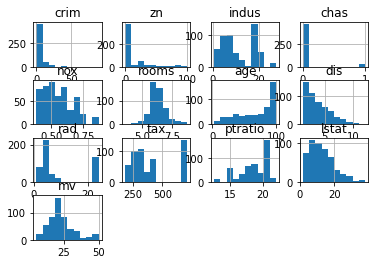

In [8]:
boston.hist()

## Correlation Heatmap

Text(0.5, 0.98, 'Correlation Heatmap for Boston')

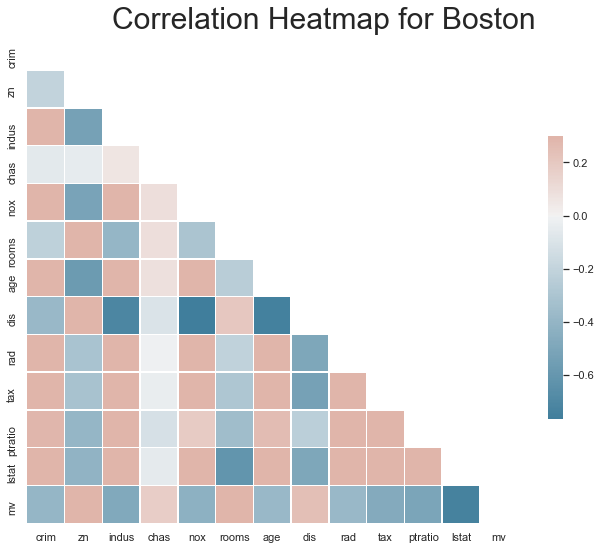

In [10]:
sns.set_theme(style="white")

#correlation matrix
corr =boston.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.subplots_adjust(top=1)
plt.suptitle("Correlation Heatmap for Boston",fontsize= 30)


<AxesSubplot:xlabel='ptratio', ylabel='tax'>

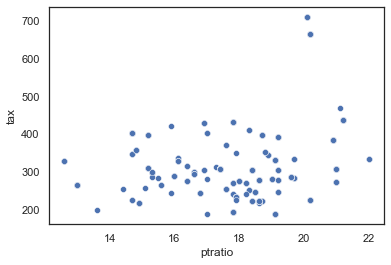

In [12]:
sns.scatterplot(boston.ptratio, boston.tax)

<AxesSubplot:xlabel='tax', ylabel='mv'>

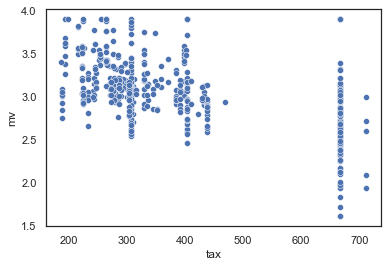

In [14]:
sns.scatterplot(boston.tax, np.log(boston.mv))


<AxesSubplot:>

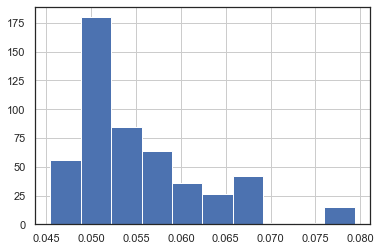

In [16]:
inv_ratio= 1/boston.ptratio
inv_ratio.hist()


<AxesSubplot:>

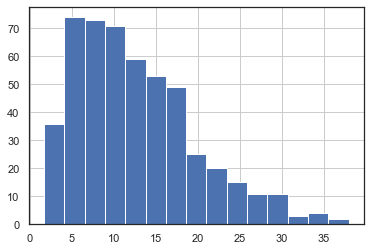

In [18]:
boston.lstat.hist(bins=15)

<AxesSubplot:>

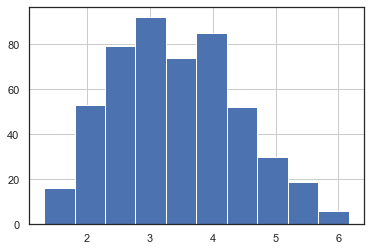

In [20]:
log = np.sqrt(boston.lstat)

log.hist()



<AxesSubplot:>

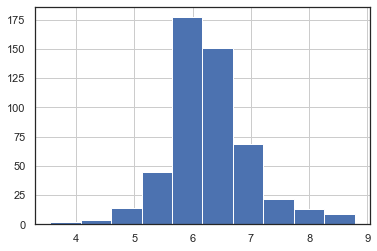

In [22]:
boston.rooms.hist()

<AxesSubplot:>

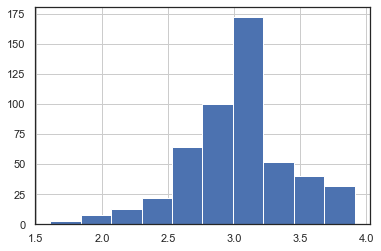

In [24]:
np.log(boston.mv).hist()

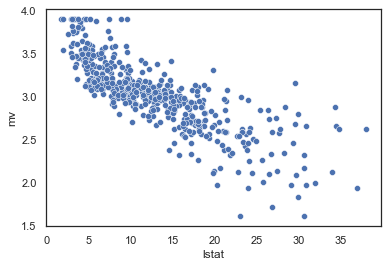

In [26]:
logplot = sns.scatterplot(y=np.log(boston.mv), x=boston.lstat)



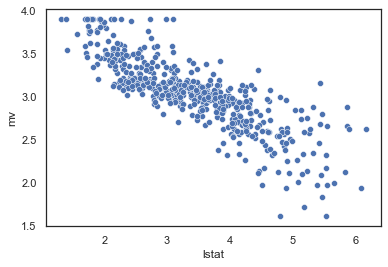

In [28]:
sqrtfeatureplot = sns.scatterplot(y=np.log(boston.mv), x= np.sqrt(boston.lstat))

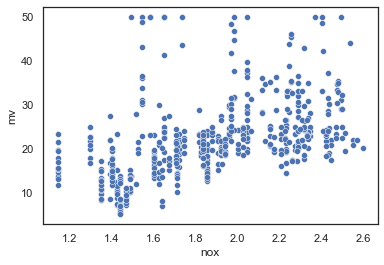

In [30]:
sqrtfeatureplot = sns.scatterplot(y=boston.mv, x= 1/boston.nox)


# C: Data Scaling and Preparation

In [32]:
boston_trimmed = boston[['mv', 'nox', 'lstat', 'ptratio', 'rooms', 'tax']]

boston_trimmed['inv_nox'] = 1/boston_trimmed['nox']
boston_trimmed['sqrt_lstat'] = np.sqrt(boston_trimmed['lstat'])
boston_trimmed['log_MV']= np.log(boston_trimmed['mv'])
boston_trimmed['inv_ptratio'] = 1/boston_trimmed['ptratio']

boston_trimmed.drop(['nox', 'lstat', 'mv','ptratio'], axis=1, inplace=True)




Text(0.5, 0.98, 'Correlation Heatmap for Boston_trimmed')

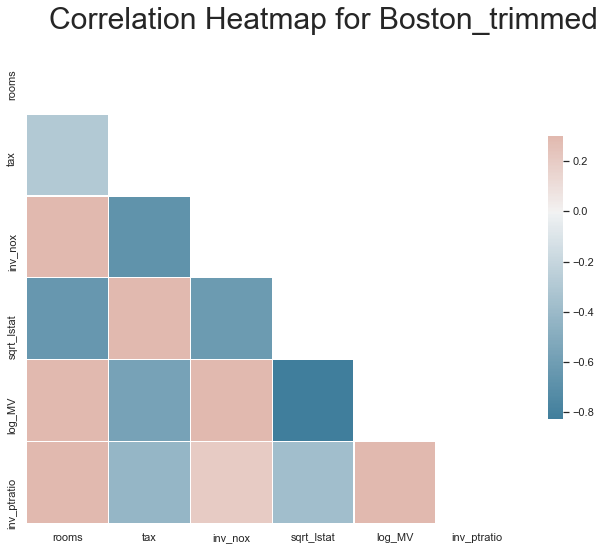

In [34]:
sns.set_theme(style="white")

#correlation matrix
corr =boston_trimmed.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.subplots_adjust(top=1)
plt.suptitle("Correlation Heatmap for Boston_trimmed",fontsize= 30)

In [36]:
# here is the data used in the non scaled models
model_data =boston_trimmed[['log_MV','sqrt_lstat', 'tax']]

In [38]:

scaler = StandardScaler()
print(scaler.fit(model_data))

# the model data will be standardized form of preliminary model data
scaled_df = pd.DataFrame(scaler.fit_transform(model_data), columns= ['log_MV', 'sqrt_lstat', 'tax'])


StandardScaler()


## Summary of what we now have
    1) scaled_df contains the scaled values for our model using standard scaler
    2) model_data contains unscaled model data.



## Create Train and Test ; prep for modeling by separating dependant and independant variables.

In [40]:
# splits both scaled and unscaled data in same random state.
ScaledTrain_set, ScaledTest_set = train_test_split(scaled_df, test_size = 0.2, random_state = RANDOM_SEED)
Train_set, Test_set = train_test_split(model_data, test_size = 0.2, random_state = RANDOM_SEED)


#separate features from labels for scaled data
ScaledTrain_Labels = ScaledTrain_set['log_MV'].copy()
ScaledTest_Labels = ScaledTest_set['log_MV'].copy()
ScaledTrain_Features = ScaledTrain_set.drop('log_MV', axis=1)
ScaledTest_Features = ScaledTest_set.drop('log_MV', axis=1)

#separate features from labels for non scaled data
Train_Labels = Train_set['log_MV'].copy()
Test_Labels = Test_set['log_MV'].copy()

Train_Features = Train_set.drop('log_MV', axis=1)
Test_Features = Test_set.drop('log_MV', axis=1)




# D: Impact of regression statistics on scaled vs unscaled data

# 1. LinearRegression 
    I wanted to try the traditional statistics approach, add features in which appear significant based on correlation strength. 
    So I limited the features being brought into the model in this case and the ElasticNet case (to compare the different results obtained from the two regressions). Later Ridge regression was used to identify the most impactful features via their coefficient weights.
    Linear regression was performed subsequently including all of those identified features.

## 1a) LinearRegressor with non scaled data 

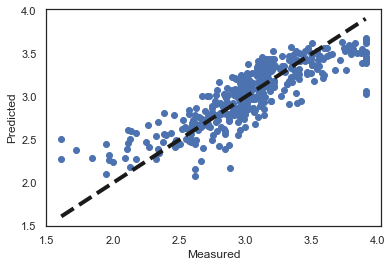

In [42]:
L_regress = LinearRegression()
L_regress.fit(Train_Features,Train_Labels)

Train_Labels_pred = L_regress.predict(Train_Features)

fig, train = plt.subplots()
train.scatter(Train_Labels, Train_Labels_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
train.plot([Train_Labels.min(), Train_Labels.max()], [Train_Labels.min(), Train_Labels.max()], 'k--', lw=4)
train.set_xlabel('Measured')
train.set_ylabel('Predicted')

plt.show()

### Summary Statistics (non scaled data LinearRegression)

In [44]:
regression_results(Train_Labels,Train_Labels_pred)

explained_variance:  0.7179
r2:  0.7179
MAE:  0.1694
MSE:  0.0485
RMSE:  0.2203


In [46]:
coefs = np.append(L_regress.intercept_,L_regress.coef_)

model_statistics(x_actual=Train_Features, y_actual=Train_Labels, y_predict=Train_Labels_pred, coefs=coefs)

,Coefficients,Standard Errors,t values,Probabilities
0,4.2454,0.040,106.719,0.0
1,-0.3107,0.013,-23.858,0.0
2,-0.0004,0.000,-4.800,0.0


### CrossValidation (non scaled data LinearRegression)

In [48]:
L_regress = LinearRegression()
L_regress.fit(Train_Features,Train_Labels)
kfold = KFold(n_splits=8, random_state=RANDOM_SEED)


cv_results = np.sqrt(-cross_val_score(L_regress, Train_Features, Train_Labels, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)



[0.2376965  0.17860969 0.25201037 0.20794786 0.24322465 0.21615601
 0.22409552 0.20593021]


## 1b) LinnearRegressor  for the scaled data
    Scaling the data produces the same significance and r2 of the fit but coefficients and the residuals have moved quite a bit. We've moved everything in terms of distance!

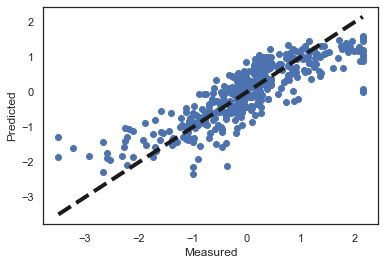

In [110]:
Scaled_L_regress = LinearRegression()
Scaled_L_regress.fit(ScaledTrain_Features,ScaledTrain_Labels)

Scaled_Train_Labels_pred = Scaled_L_regress.predict(ScaledTrain_Features)

#parity plot of predicted vs actual
fig, Scientist = plt.subplots()
Scientist.scatter(ScaledTrain_Labels, Scaled_Train_Labels_pred)

Scientist.plot([ScaledTrain_Labels.min(), ScaledTrain_Labels.max()], [ScaledTrain_Labels.min(), ScaledTrain_Labels.max()], 'k--', lw=4)
Scientist.set_xlabel('Measured')
Scientist.set_ylabel('Predicted')

plt.show()

### Summary Statistics (scaled data LinearRegression)

In [52]:
regression_results(ScaledTrain_Labels,Scaled_Train_Labels_pred)

explained_variance:  0.7179
r2:  0.7179
MAE:  0.4152
MSE:  0.2916
RMSE:  0.54


In [54]:
LM_Scaled_coefs = np.append(Scaled_L_regress.intercept_, Scaled_L_regress.coef_)

model_statistics(x_actual=ScaledTrain_Features, y_actual=ScaledTrain_Labels, y_predict=Scaled_Train_Labels_pred, coefs=LM_Scaled_coefs)

,Coefficients,Standard Errors,t values,Probabilities
0,-0.0089,0.027,-0.331,0.741
1,-0.7511,0.031,-23.858,0.000
2,-0.1544,0.032,-4.800,0.000


### Cross Validation (scaled data LinearRegression)

In [116]:
Std_L_regress = LinearRegression()
Std_L_regress.fit(ScaledTrain_Features, ScaledTrain_Labels)

kfold = KFold(n_splits=8, random_state=RANDOM_SEED)


cv_results = np.sqrt(-cross_val_score(Std_L_regress, ScaledTrain_Features, ScaledTrain_Labels, cv=kfold, scoring = 'neg_mean_squared_error'))
print(cv_results)

np.mean(cv_results)


[0.5827736  0.43790721 0.61786771 0.50983722 0.59632726 0.52996158
 0.54942732 0.50489043]


0.5411240427788606

 # 2. ElasticNet

## 2a) ElasticNet for the non scaled data
    
    1) This is still on our limited features as above in the LinearRegressor case.
    2) ElasticNet performs very similarly to the LinearRegressor

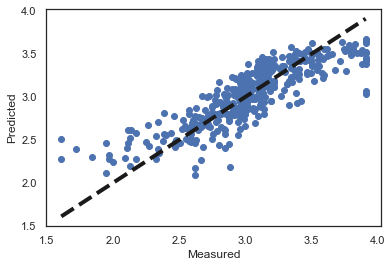

In [58]:
Elastic_regress = ElasticNet(alpha=0.005, l1_ratio= 0.5)
Elastic_regress.fit(Train_Features,Train_Labels)

EN_Train_Labels_pred = Elastic_regress.predict(Train_Features)

#parity plot of predicted vs actual
fig, train = plt.subplots()
train.scatter(Train_Labels, EN_Train_Labels_pred)

train.set_xlabel('Measured')
train.set_ylabel('Predicted')
train.plot([Train_Labels.min(), Train_Labels.max()], [Train_Labels.min(), Train_Labels.max()], 'k--', lw=4)
plt.show()

### Summary statistics (non scaled data ElasticNet)

In [60]:
regression_results(Train_Labels, EN_Train_Labels_pred)

explained_variance:  0.7179
r2:  0.7179
MAE:  0.1693
MSE:  0.0485
RMSE:  0.2203


In [62]:
EN_coefs = np.append(Elastic_regress.intercept_, Elastic_regress.coef_)

model_statistics(x_actual= Train_Features, y_actual= Train_Labels, y_predict=EN_Train_Labels_pred, coefs=EN_coefs)

,Coefficients,Standard Errors,t values,Probabilities
0,4.2358,0.040,106.462,0.0
1,-0.3061,0.013,-23.504,0.0
2,-0.0004,0.000,-4.989,0.0


### Cross Validation (non scaled data with ElasticNet)

In [64]:

kfold = KFold(n_splits=8, random_state=RANDOM_SEED)

#get RMSE for the folds
cv_results = np.sqrt(-cross_val_score(Elastic_regress, Train_Features, Train_Labels, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)

[0.23713017 0.17842662 0.25213501 0.20869304 0.24307258 0.21627278
 0.22463492 0.20542576]


## 2b) ElasticNet for scaled data

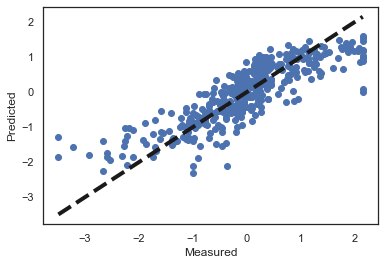

In [66]:
ScaledElastic_regress = ElasticNet(alpha=0.005, l1_ratio= 0.5)
ScaledElastic_regress.fit(ScaledTrain_Features, ScaledTrain_Labels)

ScaledEN_Train_Labels_pred = ScaledElastic_regress.predict(ScaledTrain_Features)

#parity plot of predicted vs actual
fig, Scaledtrain = plt.subplots()
Scaledtrain.scatter(ScaledTrain_Labels, ScaledEN_Train_Labels_pred)

Scaledtrain.set_xlabel('Measured')
Scaledtrain.set_ylabel('Predicted')
Scaledtrain.plot([ScaledTrain_Labels.min(), ScaledTrain_Labels.max()], [ScaledTrain_Labels.min(), ScaledTrain_Labels.max()], 'k--', lw=4)
plt.show()

### Summary statistics (scaled data ElasticNet)

In [68]:
regression_results(ScaledTrain_Labels,ScaledEN_Train_Labels_pred)

explained_variance:  0.7179
r2:  0.7179
MAE:  0.415
MSE:  0.2917
RMSE:  0.5401


In [70]:
EN_coefs = np.append(ScaledElastic_regress.intercept_, ScaledElastic_regress.coef_)

model_statistics(x_actual=ScaledTrain_Features, y_actual=ScaledTrain_Labels, y_predict=ScaledEN_Train_Labels_pred, coefs=EN_coefs)

,Coefficients,Standard Errors,t values,Probabilities
0,-0.0090,0.027,-0.333,0.739
1,-0.7474,0.031,-23.738,0.000
2,-0.1536,0.032,-4.776,0.000


### Cross-Validation and RMSE for the folds (scaled data with ElasticNet)

In [72]:
kfold = KFold(n_splits=8, random_state=RANDOM_SEED)

#get RMSE for the folds
cv_results = np.sqrt(-cross_val_score(ScaledElastic_regress, ScaledTrain_Features, ScaledTrain_Labels, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)

[0.58159001 0.43806118 0.61831368 0.51038835 0.59586699 0.53010423
 0.54960105 0.50519564]


# E. Using Ridge Regresssion to identify features versus LinearRegressor

# 1. Ridge Regression to identify features



In [74]:
#get our data back in order
boston_new =boston.copy()
boston_new['inv_nox'] = 1/boston_new['nox']
boston_new['sqrt_lstat'] = np.sqrt(boston_new['lstat'])
boston_new['inv_ptratio'] = 1/boston_new['ptratio']
boston_new['log_MV']= np.log(boston_new['mv'])

boston_new.drop(['lstat', 'nox', 'ptratio', 'mv'], axis=1, inplace=True)



In [76]:

#unscaledX = boston_new.iloc[:,1:12]
cols = boston_new.columns

Scaled_boston = pd.DataFrame(scaler.fit_transform(boston_new),
                   columns= cols)

# splits both scaled and unscaled data in same random state.
Train, Test = train_test_split(Scaled_boston, test_size = 0.2, random_state = RANDOM_SEED)



#separate features from labels for scaled data
Test_Labels = Test['log_MV'].copy()
Test_Features = Test.drop('log_MV', axis=1)

#separate features from labels for non scaled data
y = Train['log_MV'].copy()
X = Train.drop('log_MV', axis=1)




In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X,y)

ridge_predict = ridge.predict(X)



In [80]:
regression_results(y,ridge_predict)

explained_variance:  0.8024
r2:  0.8024
MAE:  0.3333
MSE:  0.1997
RMSE:  0.4469


In [82]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [84]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.223 * X0 + 0.0 * X1 + 0.034 * X2 + 0.057 * X3 + 0.128 * X4 + 0.033 * X5 + -0.259 * X6 + 0.219 * X7 + -0.227 * X8 + 0.236 * X9 + -0.601 * X10 + 0.164 * X11


In [86]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'rooms', 'age', 'dis', 'rad', 'tax',
       'inv_nox', 'sqrt_lstat', 'inv_ptratio'],
      dtype='object')

## most impactful features (in descending order) are: sqrt_lstat, dis, inv_nox, tax, crim, rad, inv_ptratio, rooms, chas, indus, age, zn



# 2. LinearRegression with all features

 Let's fit the linear regressor again with all the features!

##Then we can use the significant terms identified in the ridge regression to see how linear regressor performs relative to the ridge

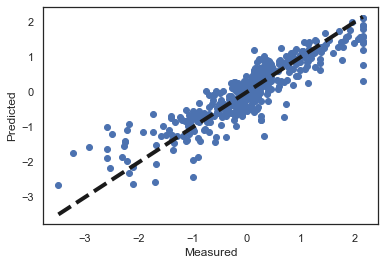

In [105]:
L_regress = LinearRegression()
L_regress.fit(X,y)

X_Labels_pred = L_regress.predict(X)

fig, train = plt.subplots()
train.scatter(y, X_Labels_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
train.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
train.set_xlabel('Measured')
train.set_ylabel('Predicted')

plt.show()

In [106]:
regression_results(y, X_Labels_pred)

all_coefs = np.append(L_regress.intercept_, L_regress.coef_)

model_statistics(x_actual= X, y_actual= y, y_predict=X_Labels_pred, coefs=all_coefs)

explained_variance:  0.8024
r2:  0.8024
MAE:  0.3335
MSE:  0.1997
RMSE:  0.4469


,Coefficients,Standard Errors,t values,Probabilities
0,-0.0021,0.023,-0.090,0.928
1,-0.2234,0.029,-7.838,0.000
2,0.0006,0.037,0.016,0.988
3,0.0354,0.044,0.801,0.424
4,0.0567,0.023,2.448,0.015
5,0.1272,0.032,3.932,0.000
6,0.0342,0.041,0.845,0.399
7,-0.2608,0.048,-5.475,0.000
8,0.2238,0.064,3.516,0.000
9,-0.2309,0.068,-3.374,0.001


## From this we can see that R2 is higher (RMSE also lower) for linear regression. 
    1) However, there are insignificant terms in our model indicated by low t-stats and high p-values in the summary table above.
    2) The regularization of the Ridge regressior penalizes the contribution of those coefficients.
    
### Let's use the most prominant features from ridge regression (those with the largest coefficients) for our linear regression: chas,  rooms, dis, inv_nox, sqrt_lstat, and inv_ptratio

In [92]:
boston_subset = boston_new[['sqrt_lstat', 'dis', 'inv_nox','tax', 'crim', 'rad', 'inv_ptratio', 'rooms', 'chas', 'log_MV']]

In [94]:
boston_subset.shape

(506, 10)

In [96]:
X_sub = boston_subset.iloc[:,0:9]
y_sub = boston_subset.iloc[:,-1]

In [98]:
X_sub.columns

Index(['sqrt_lstat', 'dis', 'inv_nox', 'tax', 'crim', 'rad', 'inv_ptratio',
       'rooms', 'chas'],
      dtype='object')

In [100]:
y_sub.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: log_MV, dtype: float64

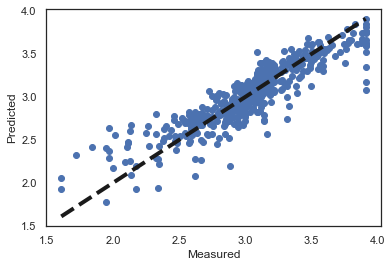

In [107]:
Lsub_regress = LinearRegression()
Lsub_regress.fit(X_sub,y_sub)

Xsub_Labels_pred = Lsub_regress.predict(X_sub)

fig, train = plt.subplots()
train.scatter(y_sub, Xsub_Labels_pred)
#plt.plot(Train_Features, Train_Labels_pred, color='blue', linewidth=3)
train.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
train.set_xlabel('Measured')
train.set_ylabel('Predicted')

plt.show()

In [108]:
regression_results(y_sub, Xsub_Labels_pred)

sub_coefs = np.append(Lsub_regress.intercept_, Lsub_regress.coef_)

model_statistics(x_actual= X_sub, y_actual= y_sub, y_predict=Xsub_Labels_pred, coefs=sub_coefs)

explained_variance:  0.8004
r2:  0.8004
MAE:  0.1346
MSE:  0.0332
RMSE:  0.1822


,Coefficients,Standard Errors,t values,Probabilities
0,2.8287,0.189,14.999,0.000
1,-0.2425,0.014,-17.618,0.000
2,-0.0520,0.007,-7.186,0.000
3,0.2422,0.050,4.806,0.000
4,-0.0006,0.000,-4.624,0.000
5,-0.0113,0.001,-9.000,0.000
6,0.0126,0.002,5.108,0.000
7,9.5999,1.345,7.136,0.000
8,0.0640,0.016,3.988,0.000
9,0.1016,0.033,3.074,0.002


### Cross Validation results (linear regression of the most impactful terms from ridge regression) 

In [117]:
kfold = KFold(n_splits=8, random_state=RANDOM_SEED)

#get RMSE for the folds
cv_results = np.sqrt(-cross_val_score(Lsub_regress, X_sub, y_sub, cv=kfold, scoring= 'neg_mean_squared_error'))
print(cv_results)
np.mean(cv_results)

[0.12090486 0.13411588 0.17666407 0.1643053  0.14865717 0.30157421
 0.36355512 0.16574458]


0.196940150905724